In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
#%是jupyter notebook的魔法命令
%matplotlib inline
# # #正常显示画图时出现的中文和负号
# from pylab import mpl
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False

#获取index数据
df=pd.read_csv("RUA_D.csv")
df.index=pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2017-01-03,2017-01-03,1334.439941,1346.729980,1334.439941,1342.689941,1342.689941,0.0
2017-01-04,2017-01-04,1343.290039,1354.020020,1343.290039,1352.979980,1352.979980,0.0
2017-01-05,2017-01-05,1352.709961,1352.979980,1345.180054,1350.310059,1350.310059,0.0
2017-01-06,2017-01-06,1350.770020,1357.310059,1347.660034,1354.050049,1354.050049,0.0
2017-01-09,2017-01-09,1353.579956,1353.579956,1348.739990,1348.739990,1348.739990,0.0


In [2]:
# !pip install arch

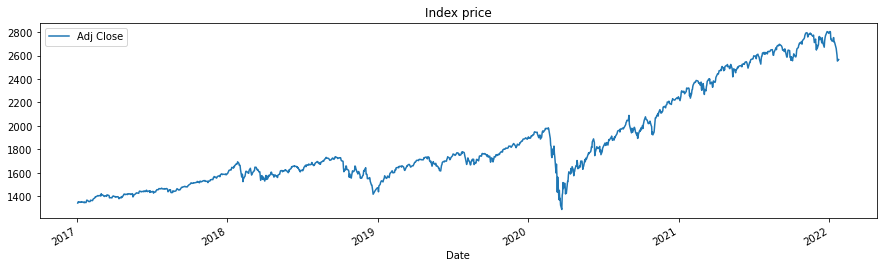

,Adj Close
Date,
2017-01-03,1342.689941
2017-01-04,1352.979980
2017-01-05,1350.310059
2017-01-06,1354.050049
2017-01-09,1348.739990
...,...
2022-01-18,2660.810059
2022-01-19,2633.860107
2022-01-20,2603.060059


In [3]:
data = df[['Adj Close']].dropna()
data.plot(title='Index price',figsize=(15,4))
plt.show()
data

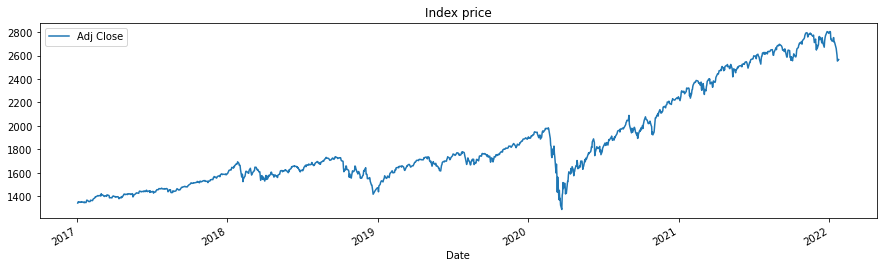

In [77]:
data_W = pd.DataFrame(data.resample('W').last()).dropna()
data_W = data
data_W.plot(title='Index price',figsize=(15,4))
plt.show()
data_W = data

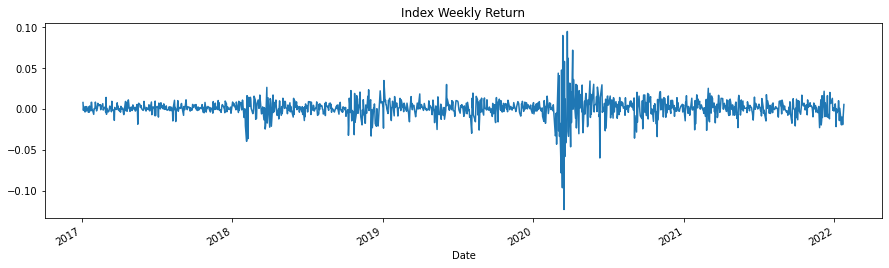

,W_ret,close
Date,,
2017-01-04,0.007664,1352.979980
2017-01-05,-0.001973,1350.310059
2017-01-06,0.002770,1354.050049
2017-01-09,-0.003922,1348.739990
2017-01-10,0.001253,1350.430054
...,...,...
2022-01-18,-0.019660,2660.810059
2022-01-19,-0.010128,2633.860107
2022-01-20,-0.011694,2603.060059


In [78]:
#index周收益率
df = pd.DataFrame(data_W.pct_change().dropna())
df.columns = ['W_ret']
df['close'] = data_W['Adj Close']
df['W_ret'].plot(title='Index Weekly Return',figsize=(15,4))
plt.show()
df

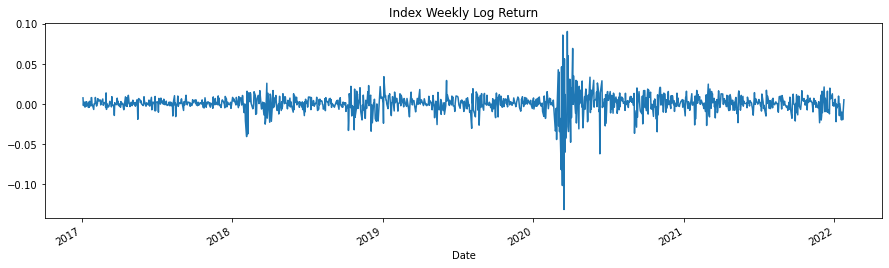

,W_ret,close,W_logret
Date,,,
2017-01-04,0.007664,1352.979980,0.007635
2017-01-05,-0.001973,1350.310059,-0.001975
2017-01-06,0.002770,1354.050049,0.002766
2017-01-09,-0.003922,1348.739990,-0.003929
2017-01-10,0.001253,1350.430054,0.001252
...,...,...,...
2022-01-18,-0.019660,2660.810059,-0.019856
2022-01-19,-0.010128,2633.860107,-0.010180
2022-01-20,-0.011694,2603.060059,-0.011763


In [79]:
#index log周收益率
df['W_logret'] = np.log(data_W['Adj Close']/data_W['Adj Close'].shift(1)).dropna()
df['W_logret'].plot(title='Index Weekly Log Return',figsize=(15,4))
plt.show()
df

In [80]:
#平稳性检验
#使用arch包中的单位根检验unitroot导入ADF
from arch.unitroot import ADF
ADF(df['W_logret'])

Test Statistic,-10.371
P-value,0.000
Lags,8


In [81]:
ADF(df['W_ret'])

Test Statistic,-10.460
P-value,0.000
Lags,8


In [82]:
#模型拟合
mod = sm.tsa.MarkovRegression(df['W_logret'].dropna(), 
k_regimes=3, trend='nc', switching_variance=True)

res = mod.fit()
res.summary()

/Users/huangsiyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/huangsiyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:               W_logret   No. Observations:                 1244
Model:               MarkovRegression   Log Likelihood                4190.242
Date:                Sun, 30 Jan 2022   AIC                          -8362.484
Time:                        16:10:02   BIC                          -8316.349
Sample:                             0   HQIC                         -8345.136
                               - 1244                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.609e-05      2e-06     13.048      0.000    2.22e-05       3e-05
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002    1.5e-05     11.090      0.000       0.000       0.000
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0022      0.001      4.079      0.000       0.001       0.003
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9737      0.008    124.841      0.000       0.958       0.989
p[1->0]        0.0426      0.012      3.457      0.001       0.018       0.067
p[2->0]     2.359e-07        nan        nan        nan         nan         nan
p[0->1]        0.0249      0.008      3.208      0.001       0.010       0.040
p[1->1]        0.9549      0.013     75.527      0.000       0.930       0.980
p[2->1]        0.0522      0.037      1.397      0.163      -0.021       0.125
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

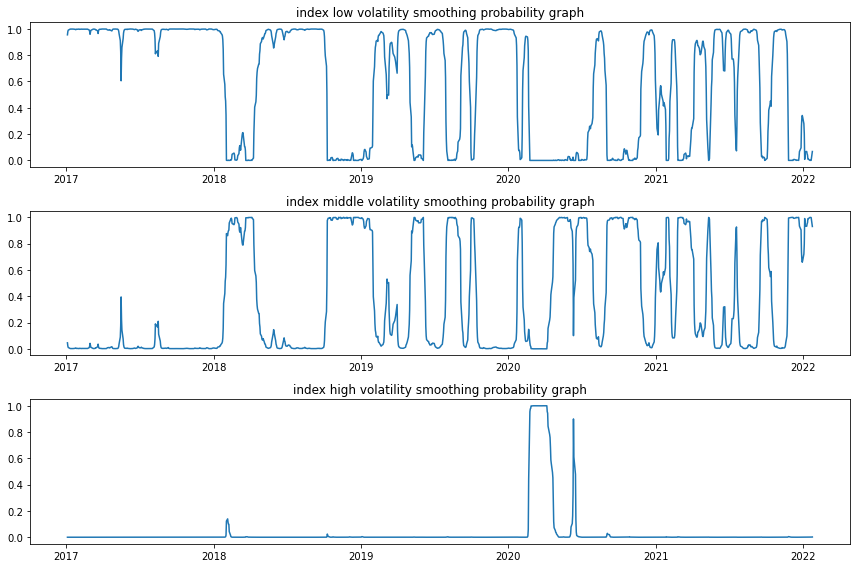

In [83]:
fig, axes = plt.subplots(3, figsize=(12,8))
ax = axes[0]
ax.plot(res.smoothed_marginal_probabilities[0])
ax.set(title='index low volatility smoothing probability graph')
ax = axes[1]
ax.plot(res.smoothed_marginal_probabilities[1])
ax.set(title='index middle volatility smoothing probability graph')
ax = axes[2]
ax.plot(res.smoothed_marginal_probabilities[2])
ax.set(title='index high volatility smoothing probability graph')
fig.tight_layout()
# static bull bear

In [84]:
df_regime_prob = res.smoothed_marginal_probabilities
df_regime_prob.tail(100)

,0,1,2
Date,,,
2021-09-01,0.996258,0.003741,9.461118e-07
2021-09-02,0.995888,0.004110,1.690949e-06
2021-09-03,0.994358,0.005639,3.057977e-06
2021-09-07,0.989356,0.010637,7.278541e-06
2021-09-08,0.980161,0.019825,1.379145e-05
...,...,...,...
2022-01-18,0.000081,0.999469,4.498767e-04
2022-01-19,0.000787,0.998799,4.134983e-04
2022-01-20,0.000625,0.998758,6.170759e-04


In [86]:
df_regime = pd.DataFrame(df_regime_prob.idxmax(1))
df_regime.columns = ["regime"]
df_regime['regime'] = df_regime['regime'].replace([2],[-1])
df_regime

,regime
Date,
2017-01-04,0
2017-01-05,0
2017-01-06,0
2017-01-09,0
2017-01-10,0
...,...
2022-01-18,1
2022-01-19,1
2022-01-20,1


In [75]:
df_regime = df_regime.merge(df, left_index = True, right_index = True, how='left')
df_regime

,regime,W_ret,close,W_logret
Date,,,,
2017-01-04,0,0.007664,1352.979980,0.007635
2017-01-05,0,-0.001973,1350.310059,-0.001975
2017-01-06,0,0.002770,1354.050049,0.002766
2017-01-09,0,-0.003922,1348.739990,-0.003929
2017-01-10,0,0.001253,1350.430054,0.001252
...,...,...,...,...
2022-01-18,1,-0.019660,2660.810059,-0.019856
2022-01-19,1,-0.010128,2633.860107,-0.010180
2022-01-20,1,-0.011694,2603.060059,-0.011763


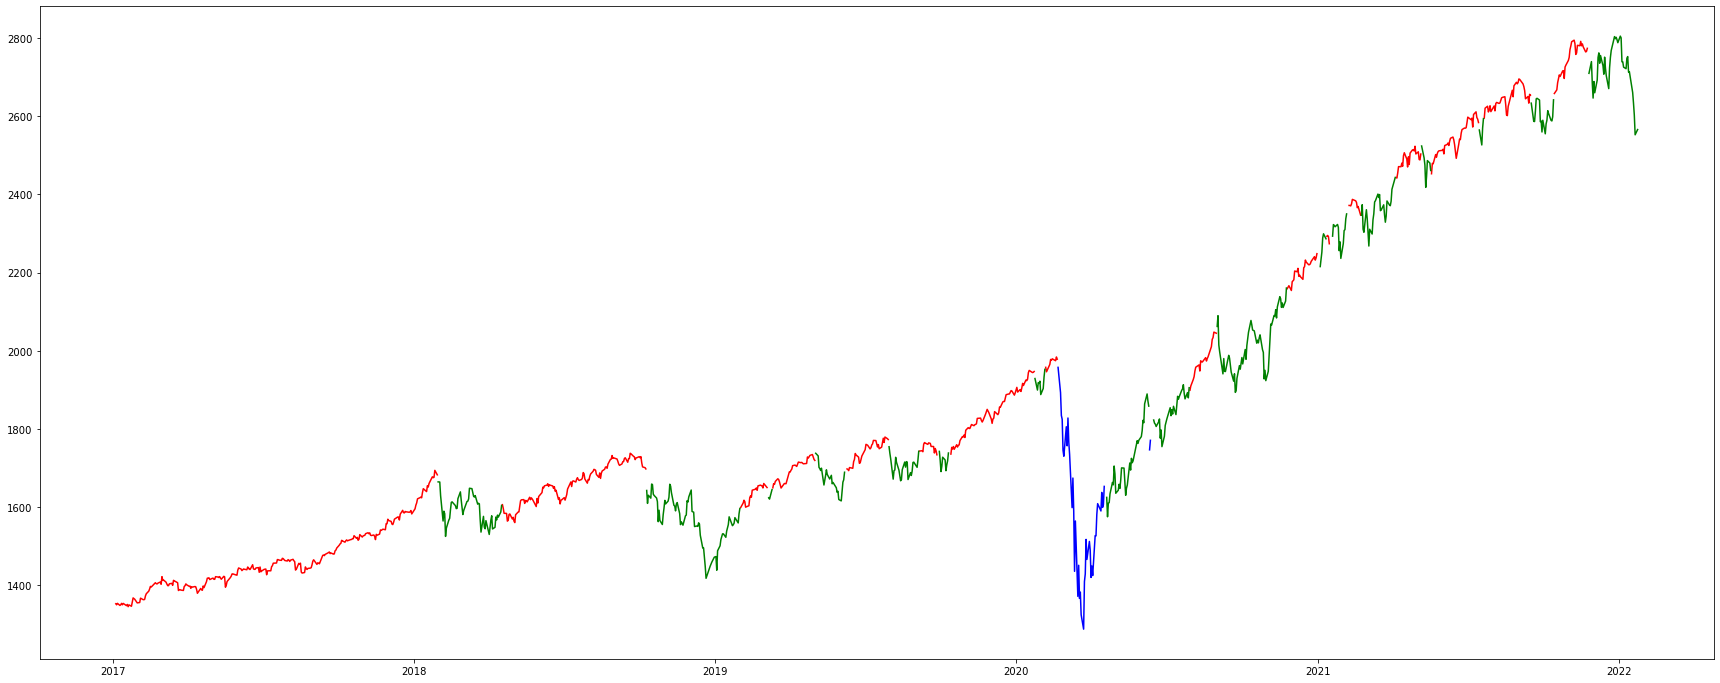

In [76]:
ret0 = df_regime[df_regime['regime'] == 0]['close']
ret0 = ret0.reindex(df_regime.index)
ret1 = df_regime[df_regime['regime'] == 1]['close']
ret1 = ret1.reindex(df_regime.index)
ret2 = df_regime[df_regime['regime'] == -1]['close']
ret2 = ret2.reindex(df_regime.index)
plt.figure(figsize=(30, 12))
plt.plot(ret0, color='r')
plt.plot(ret1, color='g')
plt.plot(ret2, color='b')
plt.show()

In [87]:
df_regime

,regime
Date,
2017-01-04,0
2017-01-05,0
2017-01-06,0
2017-01-09,0
2017-01-10,0
...,...
2022-01-18,1
2022-01-19,1
2022-01-20,1


In [64]:
df_regime["W_ret_strategy"] = (df_regime["W_ret"] * df_regime["regime"]) + 1
df_regime.loc[df_regime['regime'] == 0,"W_ret_strategy"]= 1.001

<AxesSubplot:xlabel='Date'>

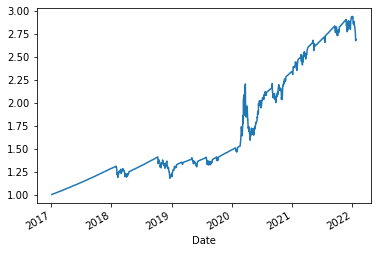

In [65]:
df_regime["W_ret_strategy"].cumprod().plot()